In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def veff(m,l,k,p,rad):
    try:
        V = (l**2/(2*m*rad**2) - k/rad**p)
        return float(V)
    except:
        V = []
        for r in rad:
            V.append(l**2/(2*m*r**2) - k/r**p)
        return np.array(V, dtype = 'float')

In [50]:
m, l , k, E, p = 1.0, 1.0, 2.0, -1.0, 1.0 #Constants

r = np.linspace(0.1,3,num=500)

V_list = veff(m,l,k,p,r) #a list of potential

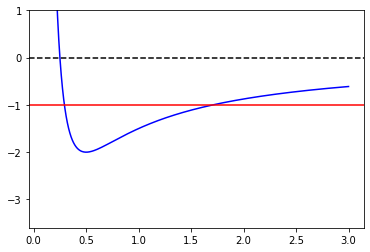

In [51]:
plt.plot(r,V_list,color='b')
plt.axhline(E,color='r')
plt.axhline(0,color='k',linestyle = 'dashed')
plt.ylim(top = 1)
plt.axis(True)
plt.show()
plt.close()

### 1-step euler method

In [52]:
def Kinetic(E,m,l,k,p,r):
    T = E - veff(m,l,k,p,r)
    return T

def velocity_sqr(E,m,l,k,p,r):
    v2 = (2/m)*Kinetic(E,m,l,k,p,r)
    return v2

In [53]:
T = Kinetic(E,m,l,k,p,r)
velocity2 = velocity_sqr(E,m,l,k,p,r)

In [54]:
phys_region = np.where(V_list <= E)
perihelion = r[phys_region[0][0]]
print("Perihelion: %f"%perihelion)
aphelion = r[phys_region[0][-1]]
print("Aphelion: %f"%aphelion)

Perihelion: 0.297595
Aphelion: 1.704008


### Time step 0.03

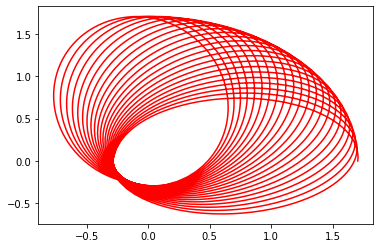

In [55]:
r0 = aphelion
theta0 = 0
t0 = 0
tstep = 0.03
rSign = 1
x1 = [r0*np.cos(theta0)]
y1 = [r0*np.sin(theta0)]

orbit_time = np.arange(start= 0, stop = 100, step = tstep)

for t in orbit_time:
    vel2 = float(velocity_sqr(E,m,l,k,p,r0))
    
    if vel2 < 0: 
        rSign = -rSign
        
    vel = rSign*np.sqrt(abs(vel2))

    r1 = r0 + vel*tstep
    dtheta = l/(m * r0**2)
    theta1 = theta0 + dtheta*tstep
   
    r0 = r1
    theta0 = theta1
    
    x1.append(r1*np.cos(theta1))
    y1.append(r1*np.sin(theta1))
    
plt.plot(x1,y1, color = 'r')

### Time Step 0.003

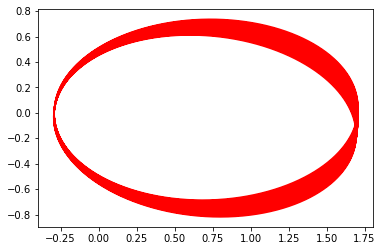

In [56]:
r0 = aphelion
theta0 = 0
t0 = 0
tstep = 0.003
rSign = 1
x2 = [r0*np.cos(theta0)]
y2 = [r0*np.sin(theta0)]

orbit_time = np.arange(start= 0, stop = 100, step = tstep)

for t in orbit_time:
    vel2 = float(velocity_sqr(E,m,l,k,p,r0))
    
    if vel2 < 0: 
        rSign = -rSign
        
    vel = rSign*np.sqrt(abs(vel2))

    r1 = r0 + vel*tstep
    dtheta = l/(m * r0**2)
    theta1 = theta0 + dtheta*tstep
   
    r0 = r1
    theta0 = theta1
    
    x2.append(r1*np.cos(theta1))
    y2.append(r1*np.sin(theta1))
    
plt.plot(x2,y2, color = 'r')

The smaller the time step, the closer the spacing in between each orbit. 

To solve this, we will need to make the time step as small as possible so we can have a stationary orbit

### 2-steps euler method 

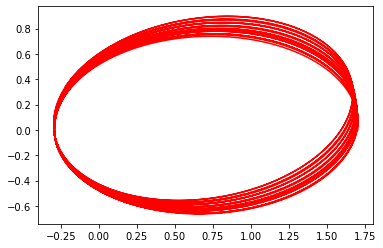

In [57]:
r0 = aphelion
theta0 = 0.0
t0 = 0.0
t_step = 0.003
rSign1 = 1
rSign2 = 1

x3 = [r0*np.cos(theta0)]
y3 = [r0*np.sin(theta0)]

orbit_time = np.arange(start= 0, stop = 100, step = t_step)

for t in orbit_time:
    vel2 = float(velocity_sqr(E,m,l,k,p,r0))
    
    if vel2 < 0:
        rSign1 = -rSign1
        
    vel = rSign1*np.sqrt(abs(vel2))
    rmid = r0 + vel*(t_step/2.0)
    vel2 = float(velocity_sqr(E,m,l,k,p,rmid))

    if vel2 < 0:
        rSign2 = -rSign2

    vel = rSign2*np.sqrt(abs(vel2))
 
    r1 = r0 + vel*t_step
    dtheta = l/(m * r0**2)
    theta1 = theta0 + dtheta*t_step

    x3.append(r1*np.cos(theta1))
    y3.append(r1*np.sin(theta1))
    
    r0 = r1
    theta0 = theta1
      
plt.plot(x3,y3, color = 'r')

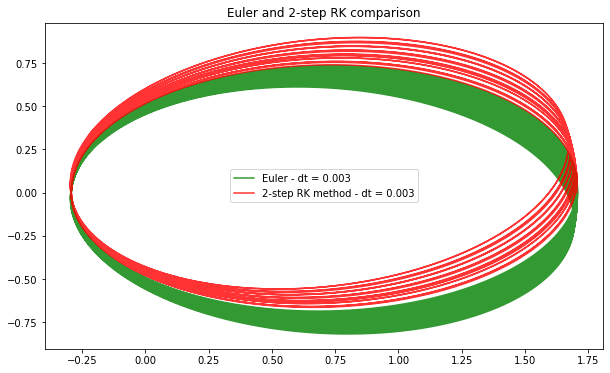

In [58]:
plt.figure(figsize=(10,6))
plt.plot(x2,y2, color='g',label = "Euler - dt = 0.003",alpha = 0.8)
plt.plot(x3,y3, color='r',label = "2-step RK method - dt = 0.003",alpha = 0.8)
plt.title("Euler and 2-step RK comparison")
plt.legend()

They looks to be pretty similar to each other

### Problem 4

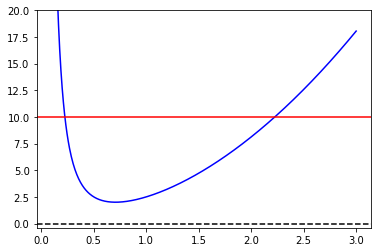

In [59]:
m = 1.0
l = 1.0
k = -2.0
E = 10
p = -2.0

r = np.linspace(0.1,3,num=500)

Veff = veff(m,l,k,p,r)
T = Kinetic(E,m,l,k,p,r)
velocity2 = velocity_sqr(E,m,l,k,p,r)

plt.plot(r,Veff,color='b')
plt.axhline(E,color='r')
plt.axhline(0,color='k',linestyle = 'dashed')
plt.ylim(top = 20)
plt.axis(True)
plt.show()
plt.close()

In [60]:
phys_region = np.where(Veff <= E)
perihelion = r[phys_region[0][0]]
print("Perihelion:%f"%perihelion)
aphelion = r[phys_region[0][-1]]
print("Aphelion: %f"%aphelion)

Perihelion:0.227856
Aphelion: 2.221242


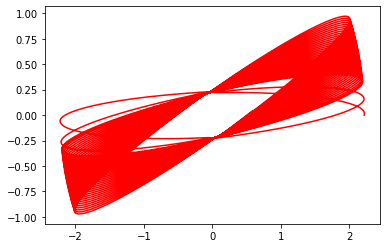

In [61]:
r0 = aphelion
theta0 = 0.0
t0 = 0.0
t_step = 0.003
rSign1 = 1
rSign2 = 1

x4 = [r0*np.cos(theta0)]
y4 = [r0*np.sin(theta0)]

orbit_time = np.arange(start= 0, stop = 100, step = t_step)

for t in orbit_time:
    vel2 = float(velocity_sqr(E,m,l,k,p,r0))
    
    if vel2 < 0:
        rSign1 = -rSign1
        
    vel = rSign1*np.sqrt(abs(vel2))
    rmid = r0 + vel*(t_step/2.0)
    vel2 = float(velocity_sqr(E,m,l,k,p,rmid))

    if vel2 < 0:
        rSign2 = -rSign2

    vel = rSign2*np.sqrt(abs(vel2))
 
    r1 = r0 + vel*t_step
    dtheta = l/(m * r0**2)
    theta1 = theta0 + dtheta*t_step

    x4.append(r1*np.cos(theta1))
    y4.append(r1*np.sin(theta1))
    
    r0 = r1
    theta0 = theta1
      
plt.plot(x4,y4, color = 'r')

Here is looks like a close orbit.

### Problem 5

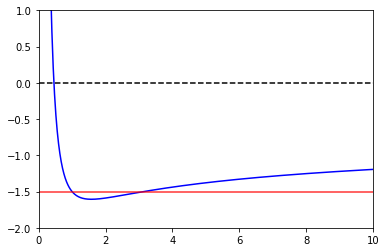

In [62]:
m, l , k, E, p = 1.0, 1.0, 2.0, -1.5, 2.0/9.0

r = np.linspace(0.1,10,num=500)

Veff = veff(m,l,k,p,r)
T = Kinetic(E,m,l,k,p,r)
velocity2 = velocity_sqr(E,m,l,k,p,r)
plt.plot(r,Veff,color='b')
plt.axhline(E,color='r',alpha = 0.8)
plt.axhline(0,color='k',linestyle = 'dashed')
plt.ylim(-2,1)
plt.xlim(0,10)
plt.axis(True)
plt.show()
plt.close()

In [63]:
phys_region = np.where(Veff <= E)
perihelion = r[phys_region[0][0]]
print("Perihelion: %f"%perihelion)
aphelion = r[phys_region[0][-1]]
print("Aphelion: %f"%aphelion)

Perihelion: 1.012625
Aphelion: 3.135471


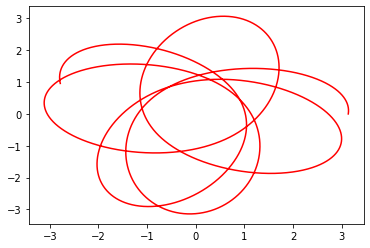

In [64]:
r0 = aphelion
theta0 = 0.0
t0 = 0.0
t_step = 0.003
rSign1 = 1
rSign2 = 1

x5 = [r0*np.cos(theta0)]
y5 = [r0*np.sin(theta0)]

orbit_time = np.arange(start= 0, stop = 100, step = t_step)

for t in orbit_time:
    vel2 = float(velocity_sqr(E,m,l,k,p,r0))
    
    if vel2 < 0:
        rSign1 = -rSign1
        
    vel = rSign1*np.sqrt(abs(vel2))
    rmid = r0 + vel*(t_step/2.0)
    vel2 = float(velocity_sqr(E,m,l,k,p,rmid))

    if vel2 < 0:
        rSign2 = -rSign2

    vel = rSign2*np.sqrt(abs(vel2))
 
    r1 = r0 + vel*t_step
    dtheta = l/(m * r0**2)
    theta1 = theta0 + dtheta*t_step

    x5.append(r1*np.cos(theta1))
    y5.append(r1*np.sin(theta1))
    
    r0 = r1
    theta0 = theta1
      
plt.plot(x5,y5, color = 'r')

Here we see that it is not a close orbit. 